<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение возраста покупателей

В проекте нам нужно построить модель для супермаркета, которая по фотографии сможет определять приблизительный возраст покупателей. 
Сначала изучим численные признаки и посмотрим на характеристики изображений. Затем выберем модель, которая покажет MAE менее 8, что является обязательным условием проекта.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Я бы посоветовал тебе подробнее раскрыть план своей работы. Это поможет тебе расставлять акценты в выводах.

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> 👌 
</div> 

<br/>   

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Исследовательский анализ данных

Для начала изучим данные, по которым будем строить модель. Посмотрим на изображения и описательную статистику по переменным.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, Flatten, MaxPooling2D, AvgPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [5]:
labels.info

<bound method DataFrame.info of        file_name  real_age
0     000000.jpg         4
1     000001.jpg        18
2     000002.jpg        80
3     000003.jpg        50
4     000004.jpg        17
...          ...       ...
7586  007608.jpg        14
7587  007609.jpg        37
7588  007610.jpg        28
7589  007611.jpg        20
7590  007612.jpg        47

[7591 rows x 2 columns]>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Выборка относительно небольшая, но мы еще можем нарастить ее, применяя аугментации


In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


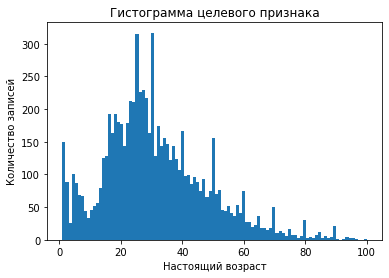

In [18]:
lab_hist = labels.plot(kind = 'hist', bins = 100, legend=None)
lab_hist.set_title('Гистограмма целевого признака')
lab_hist.set_xlabel('Настоящий возраст')
lab_hist.set_ylabel('Количество записей');

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
Гистограмма целевого признака выведена верно. Пики в районе "юбилейных" лет, они тут могут быть связаны с тем, что настоящий возраст был неизвестен тому, кто размечал датасет, и он попросту округлял его. Важно еще поработать над оформлением графика (должно быть название горизонтальной оси, вертикальной оси и самого графика)

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавила 
</div> 

<br/>   

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Большая часть данных собрана для людей от 20 до 41 года. Меньше всего данных в районе 5-15 лет. 

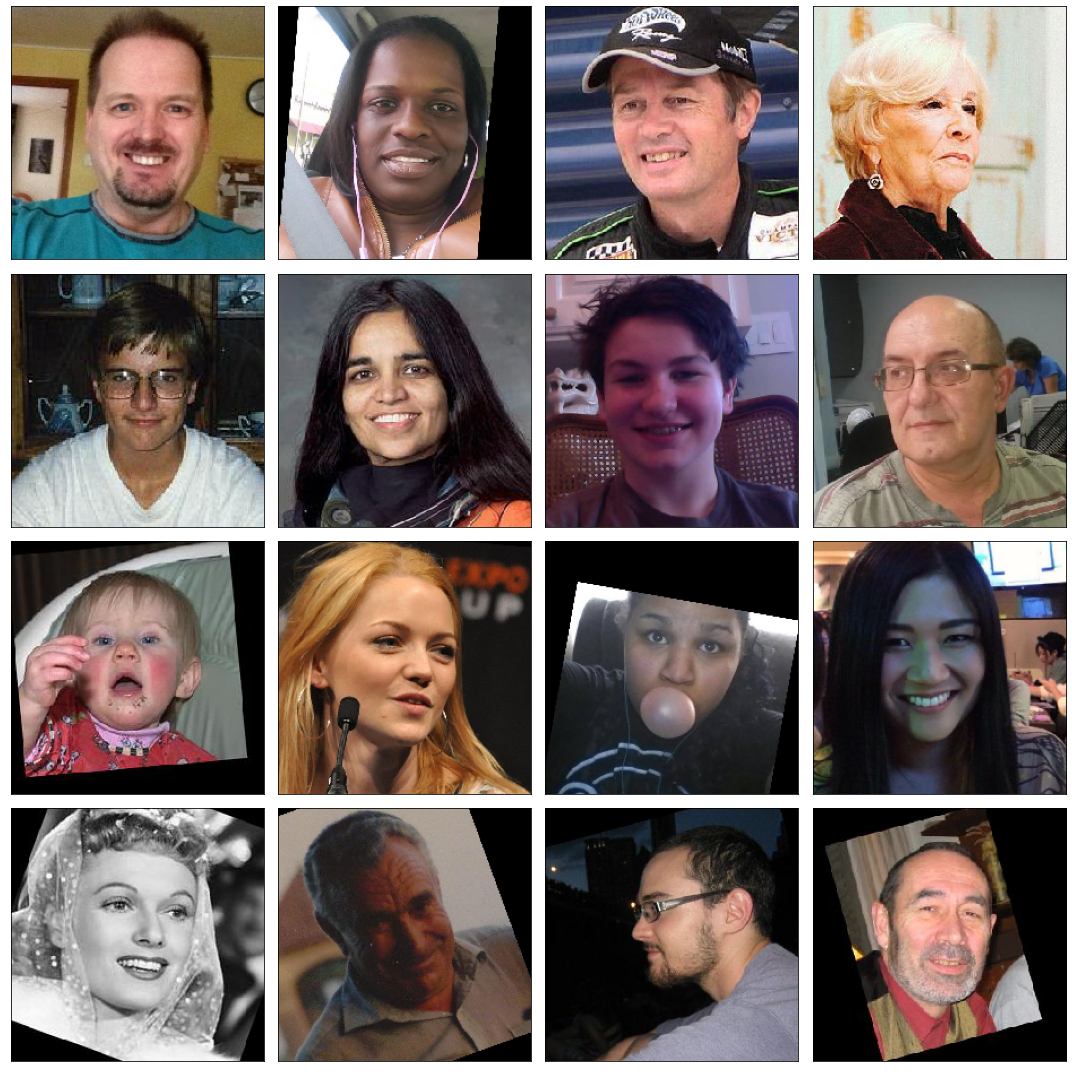

In [6]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(15,15))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Из первых 15 изображений мы видим, что есть перевернутые фото и черно-белые. Также, некоторые изображения имеют другой размер, поэтому мы учтем это в плане преобразований.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены!
    
Можно еще поработать над оформлением фото, в названиях каждого фото (title) указать возраст

__Вывод:__ малое количество изображений людей в возрасте до 18 лет может привести к тому, что модель не сможет верно их определять, что важно для системы в ситуации продажти алкоголя.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще указать в выводе, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений?
Добавь, пожалуйста.
 </div>

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавила 
</div> 

<br/>   

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, horizontal_flip=True, rescale=1./255)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


def create_model(input_shape): 
    optimizer = Adam(learning_rate = 0.0003)
    backbone = ResNet50(input_shape=input_shape, weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False) 
 
    model = Sequential() 
 
    model.add(backbone) 
    model.add(GlobalAveragePooling2D()) 
    model.add(Dense(1, activation='relu')) 
 
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae']) 
 
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Параметру  `target_size` стоит задать зн ачение `(224, 224)`, ведь на таком размере фото обучалась сеть в Imagenet.

<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Спасибо, я учту на будущее, но добавить и посмотреть метрику сейчас не успеваю =( 
</div> 

<br/>   

```

”' 

Found 5694 validated image filenames.
Found 1897 validated image filenames.
<class 'tensorflow.python.keras.engine.sequential.Sequential'>

Train for 178 steps, validate for 60 steps
Epoch 1/10
178/178 - 50s - loss: 235.3165 - mae: 11.0897 - val_loss: 648.4648 - val_mae: 20.4623
Epoch 2/10
178/178 - 40s - loss: 94.7266 - mae: 7.4063 - val_loss: 578.4345 - val_mae: 18.8402
Epoch 3/10
178/178 - 40s - loss: 69.6224 - mae: 6.3067 - val_loss: 373.6165 - val_mae: 14.3986
Epoch 4/10
178/178 - 40s - loss: 53.2694 - mae: 5.5355 - val_loss: 190.6706 - val_mae: 11.1202
Epoch 5/10
178/178 - 40s - loss: 41.7223 - mae: 4.9807 - val_loss: 119.7771 - val_mae: 8.2312
Epoch 6/10
178/178 - 40s - loss: 34.5740 - mae: 4.4785 - val_loss: 79.7502 - val_mae: 6.7692
Epoch 7/10
178/178 - 40s - loss: 27.7792 - mae: 4.0397 - val_loss: 71.0413 - val_mae: 6.2638
Epoch 8/10
178/178 - 40s - loss: 23.5809 - mae: 3.7328 - val_loss: 92.6928 - val_mae: 7.4655
Epoch 9/10
178/178 - 40s - loss: 19.1217 - mae: 3.3715 - val_loss: 67.3411 - val_mae: 6.1819
Epoch 10/10
178/178 - 40s - loss: 17.4397 - mae: 3.1892 - val_loss: 81.1353 - val_mae: 6.7931

60/60 - 10s - loss: 81.1353 - mae: 6.7931
Test MAE: 6.7931

”' 

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

Для обучения мы перевернули изображения. Далее мы использовали сверточную модель ResNet50 с алгоритмом оптимизации Adam. Использование 10 эпох дало в результате метрику MAE = 6.8, что соответсвует условию проекта (MAE < 8). Это означает, что модель может быть внедрена для определения приблизительного возраста покупателей в супермаркете для контроля продажи алкогольной продукции и предлагать соответстующие возрастной группе товары.

<div class="alert alert-success"> 
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выводы вполне логичные)

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера  <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
     
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально, молодец! Принимаю твой проект)
    
Могу поделиться такими ссылками для углубленного изучения темы спринта:
    
- Видеокурс от Stanford University: https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
    
- Курс от Физтех-школы Прикладной Математики и Информатики МФТИ: https://vk.com/dlschool_mipt
    
- Курс Нейронные сети и компьютерное зрение от Sumsung: https://stepik.org/course/50352/promo#toc    
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Удачи тебе в финальном проекте!
  
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы